In [1]:
import tensorflow as tf
import numpy as np
import keras
import matplotlib.pyplot as plt
from PIL import Image
from keras.datasets import cifar10

from tensorflow import keras
from tensorflow.keras import layers, regularizers, callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# Retrieve Images

In [2]:
IMG_HEIGHT = IMG_WIDTH = 32
BATCH_SIZE = 32


np.random.seed(42)
tf.random.set_seed(42)
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Validation images shape:", test_images.shape)
print("Validation labels shape:", test_labels.shape)

Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000, 1)
Validation images shape: (10000, 32, 32, 3)
Validation labels shape: (10000, 1)


# Image Visualization

In [ ]:
data_dict = {0 : "Airplane",
             1 : "Car",
             2 : "Bird",
             3 : "Cat",
             4 : "Deer",
             5 : "Dog",
             6 : "Frog",
             7 : "Horse",
             8 : "Ship",
             9 : "Truck",
            }

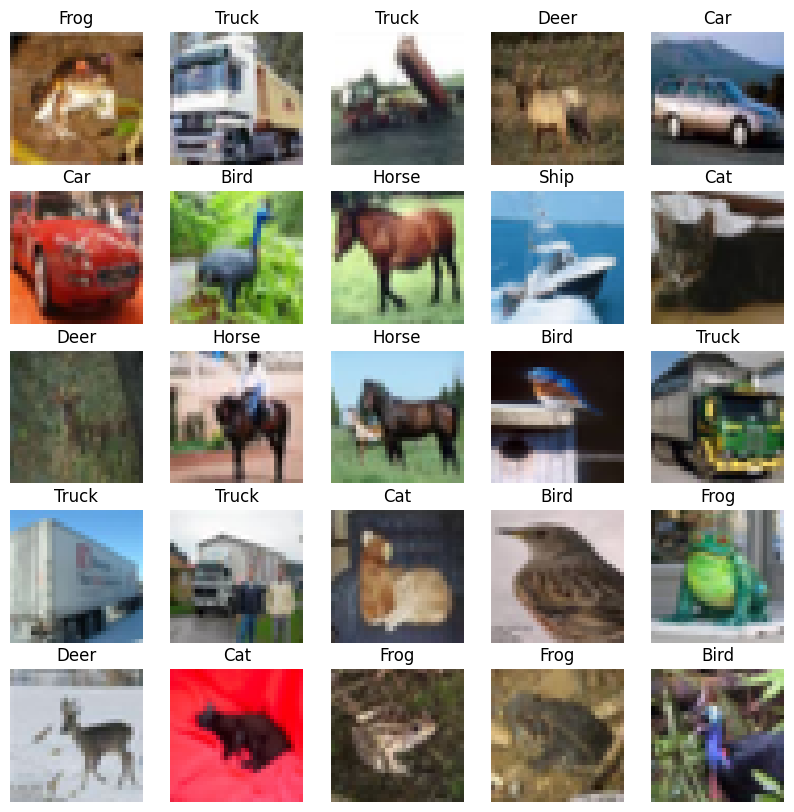

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i].astype('uint8'))
    plt.title(data_dict[int(train_labels[i])])
    plt.axis("off")

# Preprocessing

In [4]:
train_labels_cat = to_categorical(train_labels, num_classes=10)
test_labels_cat = to_categorical(test_labels, num_classes=10)

In [5]:
OPT = Adam(learning_rate=1e-5)
EPOCHS = 25

In [6]:
def acc_loss_graph(train_acc, train_loss, val_acc, val_loss):
  epochs_range = range(len(train_acc))

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, train_acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, train_loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

# Data Augmentation

In [7]:
import imgaug as ia
from imgaug import augmenters as iaa

augmentation_seq = iaa.Sequential([
    iaa.Fliplr(0.5), 
    iaa.Crop(percent=(0, 0.1)),
    iaa.GaussianBlur(sigma=(0, 1.0)),
    iaa.AdditiveGaussianNoise(scale=(0, 0.1 * 255)) 
])

In [8]:
augmented_images = augmentation_seq(images=train_images)

In [9]:
aug_train_images = np.concatenate((train_images, augmented_images), axis=0)

aug_train_labels = np.concatenate((train_labels, train_labels), axis=0)
aug_train_labels_cat = to_categorical(aug_train_labels, num_classes=10)

# Preprocessing

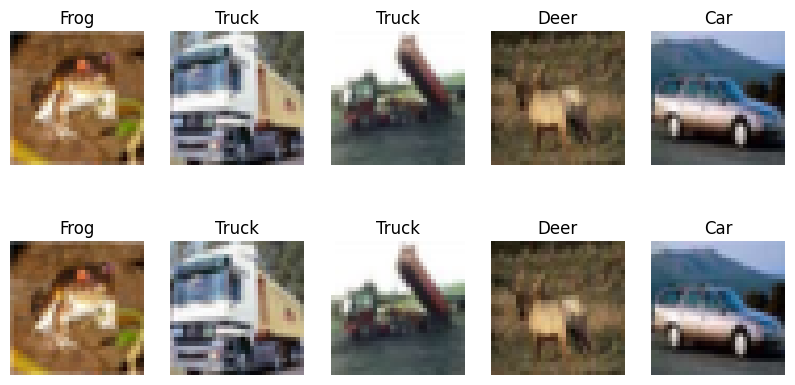

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Plot original images
for i in range(5):
    axes[0, i].imshow(train_images[i].astype('uint8'))
    axes[0, i].set_title(data_dict[int(train_labels[i])])
    axes[0, i].axis('off')

# Plot augmented images
for i in range(5):
    axes[1, i].imshow(aug_train_images[i].astype('uint8'))
    axes[1, i].set_title(data_dict[int(train_labels[i])])
    axes[1, i].axis('off')

In [ ]:
model_cnn_aug = Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')       
])

In [ ]:
model_cnn_aug.compile(optimizer=OPT,
                      loss=tf.keras.losses.CategoricalCrossentropy(),
                      metrics=['accuracy'])

In [ ]:
model_cnn_aug.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

## Normalization

In [ ]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
aug_train_images = aug_train_images.astype('float32') / 255

# NN

In [ ]:
model = keras.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.1),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.1),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.1),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer=OPT,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1573376   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)              

In [ ]:
history = model.fit(train_images, 
                    train_labels_cat, 
                    epochs=EPOCHS, 
                    validation_data=(test_images, test_labels_cat))

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 13s 5ms/step - loss: 3.3937 - accuracy: 0.2469 - val_loss: 3.1622 - val_accuracy: 0.3375
Epoch 2/25
1563/1563 [==============================] - 7s 5ms/step - loss: 3.1211 - accuracy: 0.3274 - val_loss: 2.9935 - val_accuracy: 0.3653
Epoch 3/25
1563/1563 [==============================] - 8s 5ms/step - loss: 2.9802 - accuracy: 0.3593 - val_loss: 2.8741 - val_accuracy: 0.3965
Epoch 4/25
1563/1563 [==============================] - 7s 4ms/step - loss: 2.8868 - accuracy: 0.3758 - val_loss: 2.7952 - val_accuracy: 0.4056
Epoch 5/25
1563/1563 [==============================] - 7s 5ms/step - loss: 2.8109 - accuracy: 0.3946 - val_loss: 2.7360 - val_accuracy: 0.4140
Epoch 6/25
1563/1563 [==============================] - 7s 4ms/step - loss: 2.7533 - accuracy: 0.4042 - val_loss: 2.6808 - val_accuracy: 0.4289
Epoch 7/25
1563/1563 [==============================] - 6s 4ms/step - loss: 2.7091 - accuracy: 0.4156 - val_loss: 2.6399 - val_accuracy: 0.4380
Ep

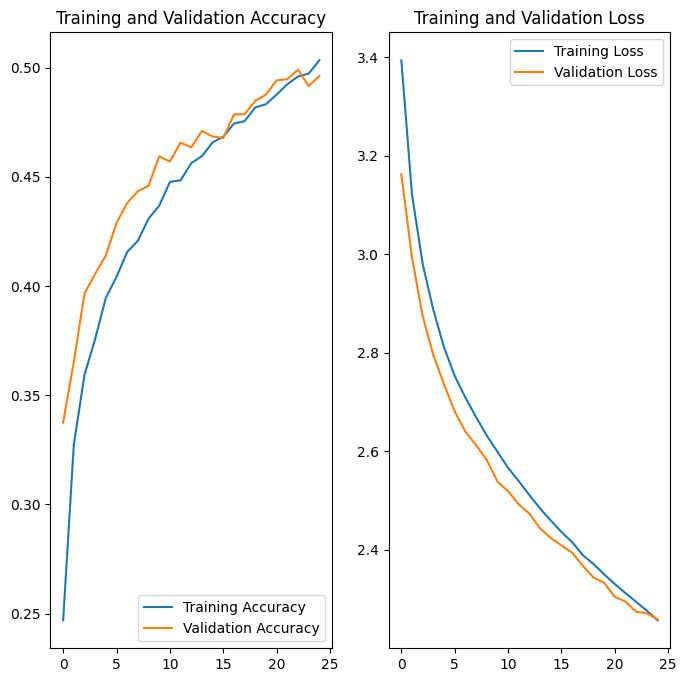

In [ ]:
acc_loss_graph(history.history['accuracy'], 
               history.history['loss'], 
               history.history['val_accuracy'], 
               history.history['val_loss'])

# CNN

In [ ]:
model_cnn = Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')       
])

In [ ]:
model_cnn.compile(optimizer=OPT,
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])

In [ ]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

In [ ]:
history_cnn = model.fit(train_images, 
                        train_labels_cat, 
                        epochs=EPOCHS * 2, 
                        validation_data=(test_images, test_labels_cat))

Epoch 1/25
1563/1563 [==============================] - 8s 5ms/step - loss: 2.2383 - accuracy: 0.5047 - val_loss: 2.2377 - val_accuracy: 0.4988
Epoch 2/25
1563/1563 [==============================] - 7s 4ms/step - loss: 2.2210 - accuracy: 0.5074 - val_loss: 2.2221 - val_accuracy: 0.5007
Epoch 3/25
1563/1563 [==============================] - 7s 5ms/step - loss: 2.2064 - accuracy: 0.5098 - val_loss: 2.2105 - val_accuracy: 0.5035
Epoch 4/25
1563/1563 [==============================] - 7s 5ms/step - loss: 2.1928 - accuracy: 0.5128 - val_loss: 2.1987 - val_accuracy: 0.5047
Epoch 5/25
1563/1563 [==============================] - 7s 4ms/step - loss: 2.1751 - accuracy: 0.5158 - val_loss: 2.1825 - val_accuracy: 0.5060
Epoch 6/25
1563/1563 [==============================] - 7s 5ms/step - loss: 2.1597 - accuracy: 0.5197 - val_loss: 2.1781 - val_accuracy: 0.5071
Epoch 7/25
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1473 - accuracy: 0.5204 - val_loss: 2.1621 - val_accuracy:

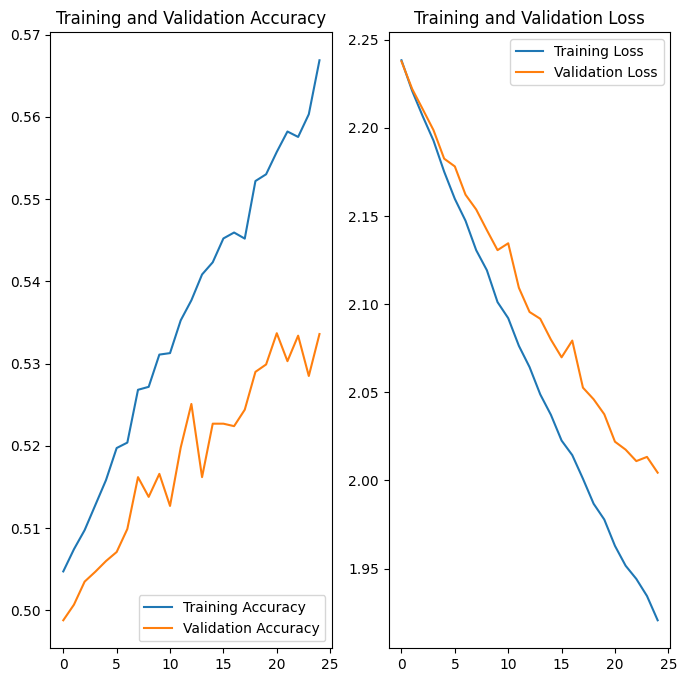

In [ ]:
acc_loss_graph(history_cnn.history['accuracy'], 
               history_cnn.history['loss'], 
               history_cnn.history['val_accuracy'], 
               history_cnn.history['val_loss'])

# Pre-trained Models

## VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

base_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
base_vgg.trainable = False

new_vgg = Sequential([
    base_vgg,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
new_vgg.compile(optimizer=Adam(learning_rate=1e-6),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

In [ ]:
new_vgg.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 133,898
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
vgg_history = new_vgg.fit(aug_train_images, 
                          aug_train_labels_cat, 
                          epochs=EPOCHS, 
                          batch_size=32,
                          validation_data=(test_images, test_labels_cat))

Epoch 1/25
3125/3125 [==============================] - 37s 10ms/step - loss: 2.3515 - accuracy: 0.1188 - val_loss: 2.3004 - val_accuracy: 0.1402
Epoch 2/25
3125/3125 [==============================] - 30s 10ms/step - loss: 2.2630 - accuracy: 0.1658 - val_loss: 2.2214 - val_accuracy: 0.2003
Epoch 3/25
3125/3125 [==============================] - 32s 10ms/step - loss: 2.2003 - accuracy: 0.2156 - val_loss: 2.1578 - val_accuracy: 0.2477
Epoch 4/25
3125/3125 [==============================] - 33s 10ms/step - loss: 2.1472 - accuracy: 0.2551 - val_loss: 2.1017 - val_accuracy: 0.2836
Epoch 5/25
3125/3125 [==============================] - 33s 11ms/step - loss: 2.0998 - accuracy: 0.2862 - val_loss: 2.0514 - val_accuracy: 0.3134
Epoch 6/25
3125/3125 [==============================] - 30s 10ms/step - loss: 2.0570 - accuracy: 0.3096 - val_loss: 2.0058 - val_accuracy: 0.3358
Epoch 7/25
3125/3125 [==============================] - 30s 10ms/step - loss: 2.0182 - accuracy: 0.3283 - val_loss: 1.9646 -

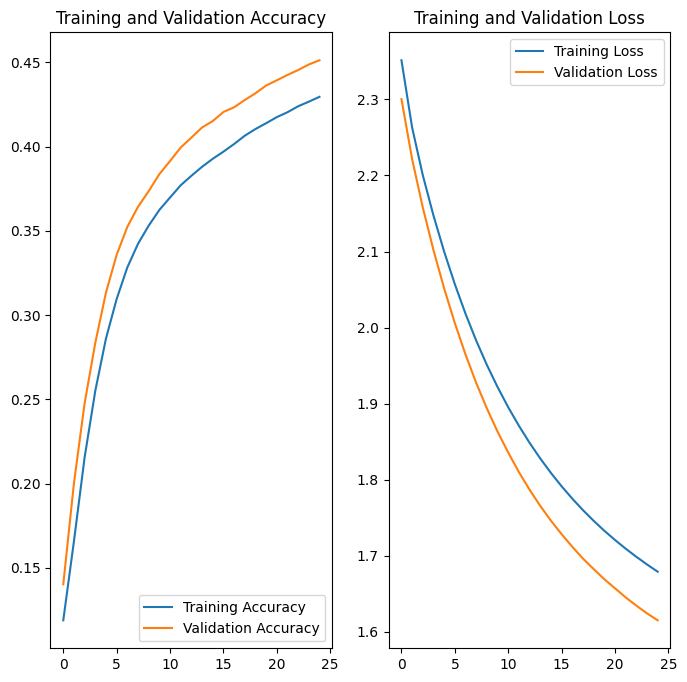

In [ ]:
acc_loss_graph(vgg_history.history['accuracy'], 
               vgg_history.history['loss'], 
               vgg_history.history['val_accuracy'], 
               vgg_history.history['val_loss'])

### Fine Tuning

In [ ]:
base_vgg.trainable = True
print("Number of layers in the base model: ", len(base_vgg.layers))

Number of layers in the base model:  19


In [ ]:
fine_tune_at = 10
for layer in base_vgg.layers[:fine_tune_at]:
  layer.trainable = False

In [ ]:
fine_tune_vgg = Sequential([
    base_vgg,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
fine_tune_vgg.compile(optimizer=Adam(learning_rate=1e-6),
                      loss=tf.keras.losses.CategoricalCrossentropy(),
                      metrics=['accuracy'])

In [ ]:
fine_tune_vgg.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 13,113,098
Non-trainable params: 1,735,488
_________________________________________________________________


In [ ]:
history_fine_tune_vgg = fine_tune_vgg.fit(aug_train_images, 
                                          aug_train_labels_cat, 
                                          epochs=EPOCHS, 
                                          batch_size=32,
                                          validation_data=(test_images, test_labels_cat))

Epoch 1/25
3125/3125 [==============================] - 84s 24ms/step - loss: 1.4807 - accuracy: 0.4886 - val_loss: 1.0416 - val_accuracy: 0.6373
Epoch 2/25
3125/3125 [==============================] - 76s 24ms/step - loss: 1.0098 - accuracy: 0.6491 - val_loss: 0.8895 - val_accuracy: 0.6922
Epoch 3/25
3125/3125 [==============================] - 76s 24ms/step - loss: 0.9017 - accuracy: 0.6859 - val_loss: 0.8287 - val_accuracy: 0.7125
Epoch 4/25
3125/3125 [==============================] - 75s 24ms/step - loss: 0.8392 - accuracy: 0.7069 - val_loss: 0.7856 - val_accuracy: 0.7264
Epoch 5/25
3125/3125 [==============================] - 73s 24ms/step - loss: 0.7939 - accuracy: 0.7218 - val_loss: 0.7586 - val_accuracy: 0.7370
Epoch 6/25
3125/3125 [==============================] - 75s 24ms/step - loss: 0.7568 - accuracy: 0.7361 - val_loss: 0.7363 - val_accuracy: 0.7452
Epoch 7/25
3125/3125 [==============================] - 75s 24ms/step - loss: 0.7265 - accuracy: 0.7450 - val_loss: 0.7188 -

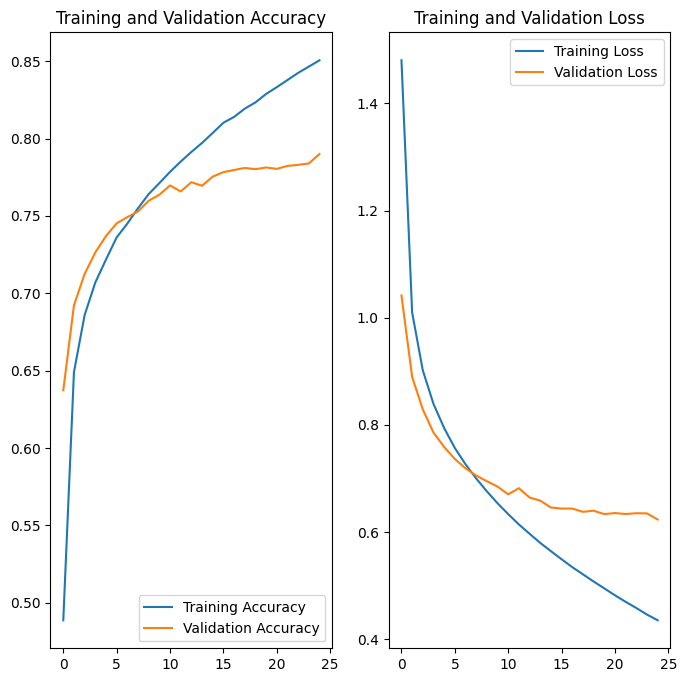

In [ ]:
acc_loss_graph(history_fine_tune_vgg.history['accuracy'], 
               history_fine_tune_vgg.history['loss'], 
               history_fine_tune_vgg.history['val_accuracy'], 
               history_fine_tune_vgg.history['val_loss'])

## ResNet-50

In [10]:
from tensorflow.keras.applications.resnet50 import ResNet50

base_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

94765736/94765736 [==============================] - 1s 0us/step


In [11]:
base_resnet.trainable = False

new_resnet = Sequential([
    base_resnet,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [12]:
new_resnet.compile(optimizer=Adam(learning_rate=1e-6),
                    loss=tf.keras.losses.CategoricalCrossentropy(),
                    metrics=['accuracy'])

In [13]:
new_resnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 24,114,826
Trainable params: 527,114
Non-trainable params: 23,587,712
_________________________________________________________________


In [14]:
history_resnet = new_resnet.fit(aug_train_images, 
                                aug_train_labels_cat, 
                                epochs=EPOCHS, 
                                batch_size=32,
                                validation_data=(test_images, test_labels_cat))

Epoch 1/25
3125/3125 [==============================] - 47s 11ms/step - loss: 3.5013 - accuracy: 0.1407 - val_loss: 2.6259 - val_accuracy: 0.2056
Epoch 2/25
3125/3125 [==============================] - 36s 12ms/step - loss: 2.4117 - accuracy: 0.2383 - val_loss: 2.1711 - val_accuracy: 0.2978
Epoch 3/25
3125/3125 [==============================] - 34s 11ms/step - loss: 2.1182 - accuracy: 0.3028 - val_loss: 1.9584 - val_accuracy: 0.3575
Epoch 4/25
3125/3125 [==============================] - 36s 11ms/step - loss: 1.9591 - accuracy: 0.3436 - val_loss: 1.8315 - val_accuracy: 0.3921
Epoch 5/25
3125/3125 [==============================] - 33s 11ms/step - loss: 1.8555 - accuracy: 0.3733 - val_loss: 1.7449 - val_accuracy: 0.4153
Epoch 6/25
3125/3125 [==============================] - 34s 11ms/step - loss: 1.7808 - accuracy: 0.3942 - val_loss: 1.6802 - val_accuracy: 0.4336
Epoch 7/25
3125/3125 [==============================] - 36s 11ms/step - loss: 1.7233 - accuracy: 0.4103 - val_loss: 1.6306 -

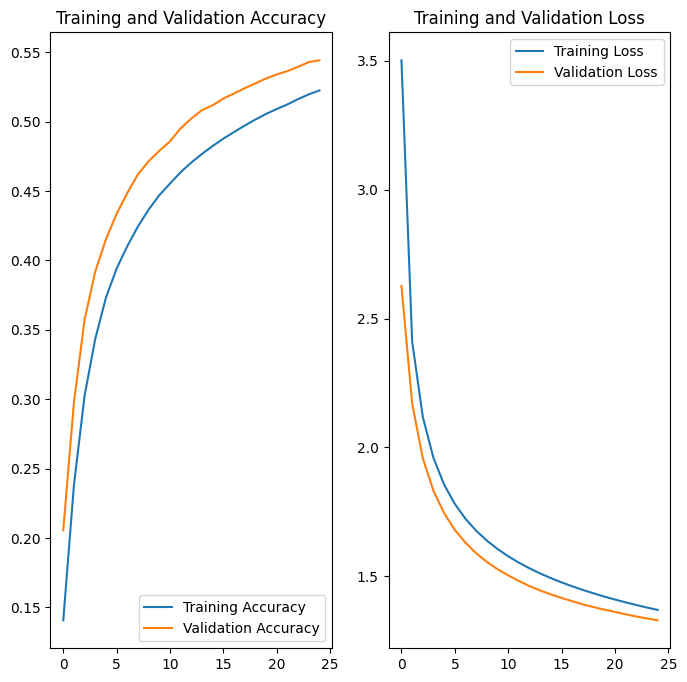

In [15]:
acc_loss_graph(history_resnet.history['accuracy'], 
               history_resnet.history['loss'], 
               history_resnet.history['val_accuracy'], 
               history_resnet.history['val_loss'])